<a href="https://colab.research.google.com/github/harttu/courses/blob/main/deep_learning_with_pytorch/Deep_learning_with_pytorch_chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 - Building Linear classifier from top to bottom and **Applying pytorch framework directly**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


nn.Linear(input_dimension, output_dimension)

In [ ]:
m = nn.Linear(10, 1)

2 set of 10 dimensional vectors of random numbers.

In [ ]:
input = torch.randn(2, 10)
input,input.shape

(tensor([[ 0.0052,  0.2618,  0.0144,  0.6396,  0.6630,  2.5755,  0.1099,  0.2383,
           0.5127, -0.5545],
         [ 1.2874,  0.6209, -1.4927, -0.1691, -1.0075, -0.4664, -0.6669, -0.8594,
           0.6558, -0.6602]]),
 torch.Size([2, 10]))

The model expects each row to be a data sample of right size. I.e having the right number of dimensions.

In [ ]:
output = m(input)
print(output.size())

torch.Size([2, 1])


## Applied to the mystery thermometer

In [ ]:
t_c = [ 0.5, 14.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0 ]
t_u = [35.7, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4 ]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [ ]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

In [ ]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([7, 5, 8, 1, 9, 0, 4, 6]), tensor([3, 2]))

In [ ]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [ ]:
t_un_train, t_un_train.shape

(tensor([4.8400, 3.3900, 6.0400, 5.8200, 6.8400, 3.5700, 4.8900, 2.1800]),
 torch.Size([8]))

Now the shape is 8. We would like it to be (8,1)

In [ ]:
t_un_train = t_un_train.reshape(8,1)
t_un_val = t_un_val.reshape(2,1)
t_un_train, t_un_train.shape

(tensor([[4.8400],
         [3.3900],
         [6.0400],
         [5.8200],
         [6.8400],
         [3.5700],
         [4.8900],
         [2.1800]]),
 torch.Size([8, 1]))

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
  for epoch in range(1,n_epochs + 1):
    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    #if epoch == 1 or epoch % 1000 == 0:
    print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}",
          f" Validation loss {loss_val.item():.4f}")

In [ ]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val )

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 172.2216  Validation loss 638.9752
Epoch 2, Training loss 89.5532  Validation loss 343.9324
Epoch 3, Training loss 69.0360  Validation loss 238.3272
Epoch 4, Training loss 63.9344  Validation loss 196.0022
Epoch 5, Training loss 62.6564  Validation loss 177.4919
Epoch 6, Training loss 62.3269  Validation loss 168.9342
Epoch 7, Training loss 62.2327  Validation loss 164.8612
Epoch 8, Training loss 62.1968  Validation loss 162.9051
Epoch 9, Training loss 62.1755  Validation loss 161.9747
Epoch 10, Training loss 62.1578  Validation loss 161.5481

Parameter containing:
tensor([[1.4419]], requires_grad=True)
Parameter containing:
tensor([0.2780], requires_grad=True)


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Basic model

In [ ]:
y = np.array([0.0,2,4,6,8,10])
x = np.array([0.0,1,2,3,4,5])

w = 1
epsilon = 0.000001
learning_rate = 0.002
epochs = 100

def loss(gold, pred):
  return ( (gold - pred) ** 2 ).sum() / len(gold)

#w = 1
def model_s(x,w):
  return w * x

losses = []

for i in range(0,epochs):
  deriv = ( loss( model_s( x , w + epsilon )  , y ) - loss( model_s( x , w - epsilon ) , y ) ) / ( 2 * epsilon )
  w =  w - learning_rate * deriv
  losses.append(loss(model_s(x,w),y))

print(w)  

1.9761406392432672


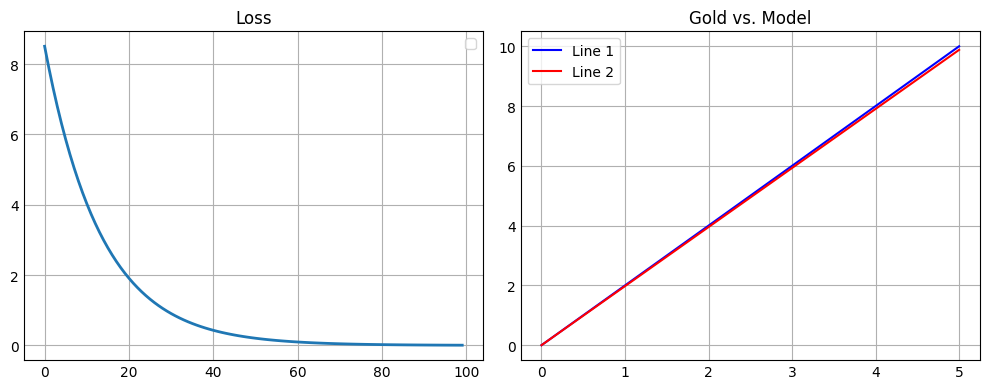

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,6), y, color='blue', label='Line 1')
axes[1].plot(range(0,6), model_s(x,w), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Adding a bias term

In [ ]:
import numpy as np


y = np.array([1.0,3,5,7,9,11])
x = np.array([0.0,1,2,3,4,5])

w = np.random.rand()
b = np.random.rand()
epsilon = 0.000001
learning_rate = 0.002
epochs = 150

def loss(gold, pred):
  return ( (gold - pred) ** 2 ).sum() / len(gold)

#w = 1
def model_s(x,w,b):
  return w * x + b

losses = []

for i in range(0,epochs):
  deriv_w = ( loss( model_s( x , w + epsilon, b )  , y )  - loss( model_s( x , w - epsilon , b ) , y ) ) / ( 2 * epsilon )
  deriv_b = ( loss( model_s( x , w , b + epsilon )  , y ) - loss( model_s( x , w  , b - epsilon ) , y ) ) / ( 2 * epsilon )
  #deriv_b = 2 * np.mean( model_s(x, w, b) - y )
  
  #deriv_b = w
  w =  w - learning_rate * deriv_w
  b = b - learning_rate * deriv_b
  loss_i = loss(model_s(x,w,b),y)
  losses.append(loss_i)
  if i % 10 == 0:
    print(f"Iter: {i} - deriv_w: {deriv_w} - deriv_b: {deriv_b} - loss_i: {loss_i} - w:{w} - b:{b}")


Iter: 0 - deriv_w: -27.972375516327475 - deriv_b: -8.13662378540414 - loss_i: 19.87843903433115 - w:0.7478048566468269 - b:0.21831109095036894
Iter: 10 - deriv_w: -18.67581331982393 - deriv_b: -5.513767824538718 - loss_i: 8.907780644023761 - w:1.1988269819475088 - b:0.35045523516939525
Iter: 20 - deriv_w: -12.462153155645694 - deriv_b: -3.7597425985858024 - loss_i: 4.005784413355241 - w:1.4998734502508209 - b:0.4402753260694787
Iter: 30 - deriv_w: -8.309130643424645 - deriv_b: -2.5864623600657666 - loss_i: 1.8151054806648332 - w:1.7006797339073059 - b:0.5017880630526612
Iter: 40 - deriv_w: -5.533454737527421 - deriv_b: -1.8013677762773739 - loss_i: 0.8357789269673929 - w:1.8344894300974517 - b:0.5443625456891095
Iter: 50 - deriv_w: -3.678407341001222 - deriv_b: -1.275750265677944 - loss_i: 0.39766347749253117 - w:1.9235228129702013 - b:0.5742613718829177
Iter: 60 - deriv_w: -2.4387138342352177 - deriv_b: -0.9235796874784707 - loss_i: 0.2013590685637073 - w:1.9826320649912736 - b:0.5956

In [ ]:
print(w,b)  

2.090492391764517 0.6659708505428161


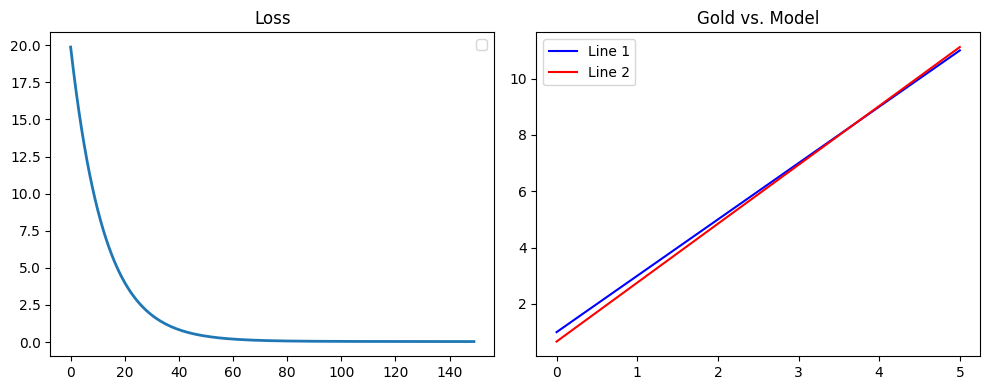

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,6), y, color='blue', label='Line 1')
axes[1].plot(range(0,6), model_s(x,w,b), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Transforming to torch

In [ ]:
import torch
y = torch.tensor([0.0,2,4,6,8,10]).unsqueeze(1)
x = torch.tensor([[0.0],[1],[2],[3],[4],[5]],requires_grad=True)
x = torch.tensor([[0.0],[1],[2],[3],[4],[5]])


In [ ]:
epsilon = 0.000001
learning_rate = 0.002
epochs = 150

w = torch.tensor(1.4, requires_grad=True)

def loss(gold, pred):
  return ( (gold - pred) ** 2 ).sum() / len(gold)

def model(x,w):
  return x * w

losses = []

for i in range(0,epochs):
  # eli pelkästään 
  loss_i = loss(model(x,w),y)
  loss_i.backward()
  deriv_w = w.grad
  w = w - 0.001 * deriv_w
  w.retain_grad()
  #if w.grad is not None:
  #  w.grad.zero()
  #w.grad.zero()
  losses.append(loss_i.detach().numpy())
  if i % 50 == 0:
    print(f"Iter: {i} - deriv_w: {deriv_w} -  loss_i: {loss_i} - w:{w} ")


Iter: 0 - deriv_w: -11.000000953674316 -  loss_i: 3.299999952316284 - w:1.4110000133514404 
Iter: 50 - deriv_w: -4.361087322235107 -  loss_i: 0.5187022089958191 - w:1.7664835453033447 
Iter: 100 - deriv_w: -1.7290064096450806 -  loss_i: 0.08153081685304642 - w:1.9074195623397827 


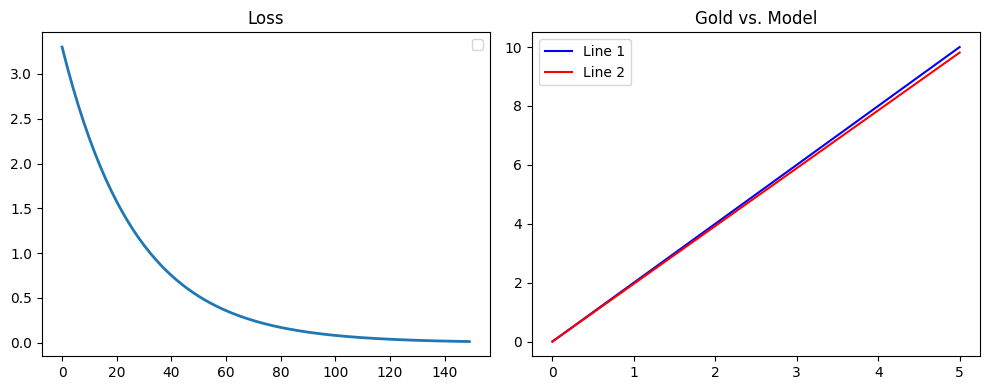

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,6), y, color='blue', label='Line 1')
axes[1].plot(range(0,6), model(x,w.detach().numpy()), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
import torch
y = torch.tensor([0.0,2,4,6,8,10]).unsqueeze(1)
x = torch.tensor([[0.0],[1],[2],[3],[4],[5]],requires_grad=True)

epsilon = 0.000001
learning_rate = 0.002
epochs = 5000

w = torch.tensor(1.4)

def loss(gold, pred):
  return ( (gold - pred) ** 2 ).sum() / len(gold)

def model(x,w):
  return x * w

losses = []

for i in range(0,epochs):
  # eli pelkästään 
  loss_i = loss(model(x,w),y)
  loss_i.backward()
  deriv_x = x.grad
  x = x - 0.001 * deriv_x
  x.retain_grad()
  #if w.grad is not None:
  #  w.grad.zero()
  #w.grad.zero()
  losses.append(loss_i.detach().numpy())
  if i % 1000 == 0:
    print(f"Iter: {i} - deriv_w: {deriv_x} -  loss_i: {loss_i} - w:{w} - x:{x}")


Iter: 0 - deriv_w: tensor([[ 0.0000],
        [-0.2800],
        [-0.5600],
        [-0.8400],
        [-1.1200],
        [-1.4000]]) -  loss_i: 3.299999952316284 - w:1.399999976158142 - x:tensor([[0.0000],
        [1.0003],
        [2.0006],
        [3.0008],
        [4.0011],
        [5.0014]], grad_fn=<SubBackward0>)
Iter: 1000 - deriv_w: tensor([[ 0.0000],
        [-0.1457],
        [-0.2913],
        [-0.4370],
        [-0.5826],
        [-0.7283]]) -  loss_i: 0.8930017948150635 - w:1.399999976158142 - x:tensor([[0.0000],
        [1.2058],
        [2.4116],
        [3.6173],
        [4.8231],
        [6.0289]], grad_fn=<SubBackward0>)
Iter: 2000 - deriv_w: tensor([[ 0.0000],
        [-0.0758],
        [-0.1515],
        [-0.2273],
        [-0.3031],
        [-0.3788]]) -  loss_i: 0.24165129661560059 - w:1.399999976158142 - x:tensor([[0.0000],
        [1.3127],
        [2.6253],
        [3.9380],
        [5.2507],
        [6.5634]], grad_fn=<SubBackward0>)
Iter: 3000 - deriv_w: ten

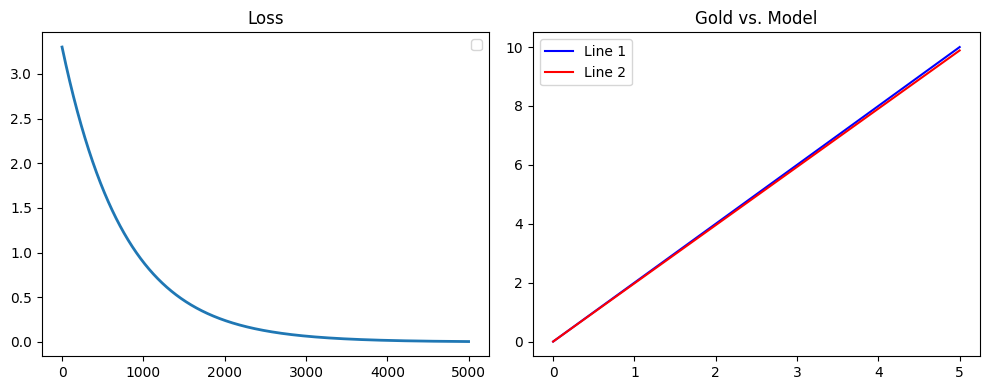

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,6), y, color='blue', label='Line 1')
axes[1].plot(range(0,6), model(x.detach().numpy(),w.detach().numpy()), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
x * w, y , loss(x * w, y)

(tensor([[0.0000],
         [1.9771],
         [3.9543],
         [5.9314],
         [7.9086],
         [9.8857]], grad_fn=<MulBackward0>),
 tensor([[ 0.],
         [ 2.],
         [ 4.],
         [ 6.],
         [ 8.],
         [10.]]),
 tensor(0.0048, grad_fn=<DivBackward0>))

Torch with weight and bias

In [21]:
import torch
y = torch.tensor([1.0,3,5,7,9,11]).unsqueeze(1)
x = torch.tensor([[0.0],[1],[2],[3],[4],[5]])

epsilon = 0.000001
learning_rate = 0.02
epochs = 100

w = torch.tensor(1.4,requires_grad = True)
b = torch.tensor(0.1,requires_grad = True)

def loss(gold, pred):
  return ( (gold - pred) ** 2 ).sum() / len(gold)

def model(x,w,b):
  return x * w + b

losses = []

for i in range(0,epochs + 1):
  #print(i)
  if w.grad is not None:
    w.grad.zero_()
  if b.grad is not None:
    b.grad.zero_()
  # eli pelkästään 
  loss_i = loss(model(x,w,b),y)
  loss_i.backward()
  deriv_w = w.grad
  deriv_b = b.grad
  #with torch.no_grad():
  w = w - learning_rate * deriv_w
  b = b - learning_rate * deriv_b
  w.retain_grad()
  b.retain_grad()
  #if w.grad is not None:
  #  w.grad.zero()
  #w.grad.zero()
  losses.append(loss_i.detach().numpy())
  if i % (epochs/10) == 0:
    print(f"Iter: {i} - deriv_w: {deriv_w} -  loss_i: {loss_i} - w:{w} - b:{b}")


Iter: 0 - deriv_w: -15.500001907348633 -  loss_i: 6.810000896453857 - w:1.7100000381469727 - b:0.19600000977516174
Iter: 10 - deriv_w: -0.002704538404941559 -  loss_i: 0.11557874083518982 - w:2.1642792224884033 - b:0.4049859046936035
Iter: 20 - deriv_w: 0.08822968602180481 -  loss_i: 0.09089115262031555 - w:2.148642063140869 - b:0.4724680483341217
Iter: 30 - deriv_w: 0.0789334774017334 -  loss_i: 0.07165598124265671 - w:2.131998062133789 - b:0.5316079258918762
Iter: 40 - deriv_w: 0.07008935511112213 -  loss_i: 0.05649155005812645 - w:2.117201328277588 - b:0.584113359451294
Iter: 50 - deriv_w: 0.06223265081644058 -  loss_i: 0.04453636333346367 - w:2.1040635108947754 - b:0.6307331323623657
Iter: 60 - deriv_w: 0.0552525520324707 -  loss_i: 0.03511109575629234 - w:2.092398166656494 - b:0.6721269488334656
Iter: 70 - deriv_w: 0.04906082898378372 -  loss_i: 0.02768062613904476 - w:2.082040548324585 - b:0.708880603313446
Iter: 80 - deriv_w: 0.04356257617473602 -  loss_i: 0.021822577342391014 -

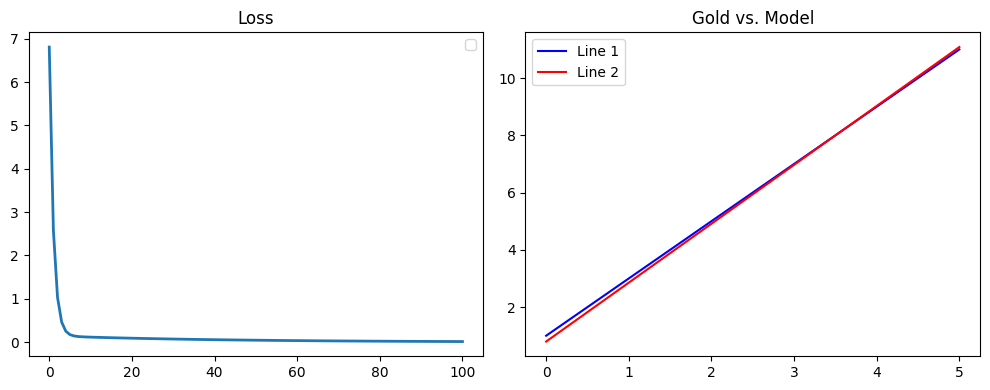

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs+1), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,6), y, color='blue', label='Line 1')
axes[1].plot(range(0,6), model(x.detach().numpy(),w.detach().numpy(),b.detach().numpy()), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [23]:
pred = model(x,w,b)
pred, loss(y, pred)

(tensor([[ 0.7962],
         [ 2.8536],
         [ 4.9111],
         [ 6.9685],
         [ 9.0259],
         [11.0834]], grad_fn=<AddBackward0>),
 tensor(0.0132, grad_fn=<DivBackward0>))

In [24]:
pred_ = model(x,2,1)
pred_, loss(y, pred_)

(tensor([[ 1.],
         [ 3.],
         [ 5.],
         [ 7.],
         [ 9.],
         [11.]]),
 tensor(0.))

In [64]:
3 * next(model.parameters()).grad

tensor([[-86.2242]])

## With Linear model

In [69]:
import torch
y = torch.tensor([1.0,3,5,7,9,11]).unsqueeze(1)
x = torch.tensor([[0.0],[1],[2],[3],[4],[5]])

epsilon = 0.000001
learning_rate = 0.02
epochs = 100

w = torch.tensor(1.4,requires_grad = True)
b = torch.tensor(0.1,requires_grad = True)

def loss(gold, pred):
  return ( (gold - pred) ** 2 ).sum() / len(gold)

#def model(x,w,b):
#  return x * w + b
model = torch.nn.Linear(1,1)

losses = []

for i in range(0,epochs + 1):
  # eli pelkästään 
  loss_i = loss(model(x),y)
  
  model.zero_grad()
  
  loss_i.backward()

  with torch.no_grad():
    for param in model.parameters():
      #print(param)
      #param = param - learning_rate * param.grad
      param -= learning_rate * param.grad

  #if w.grad is not None:
  #  w.grad.zero()
  #w.grad.zero()
  losses.append(loss_i.detach().numpy())
  if i % (epochs/10) == 0:
    print(f"Iter: {i} - deriv_w: {deriv_w} -  loss_i: {loss_i} - w:{model.weight.detach().numpy()} - b:{model.bias.detach().numpy()}")


Iter: 0 - deriv_w: None -  loss_i: 40.71485900878906 - w:[[1.0775173]] - b:[-0.24249734]
Iter: 10 - deriv_w: None -  loss_i: 0.21509747207164764 - w:[[2.2199962]] - b:[0.18960486]
Iter: 20 - deriv_w: None -  loss_i: 0.1681935340166092 - w:[[2.2021787]] - b:[0.28237662]
Iter: 30 - deriv_w: None -  loss_i: 0.1325988620519638 - w:[[2.1795602]] - b:[0.36283296]
Iter: 40 - deriv_w: None -  loss_i: 0.10453713685274124 - w:[[2.1594324]] - b:[0.43425772]
Iter: 50 - deriv_w: None -  loss_i: 0.08241411298513412 - w:[[2.1415606]] - b:[0.49767578]
Iter: 60 - deriv_w: None -  loss_i: 0.06497298926115036 - w:[[2.125692]] - b:[0.5539849]
Iter: 70 - deriv_w: None -  loss_i: 0.051222771406173706 - w:[[2.1116023]] - b:[0.6039819]
Iter: 80 - deriv_w: None -  loss_i: 0.04038259759545326 - w:[[2.099092]] - b:[0.64837444]
Iter: 90 - deriv_w: None -  loss_i: 0.031836461275815964 - w:[[2.087984]] - b:[0.68779063]
Iter: 100 - deriv_w: None -  loss_i: 0.02509899251163006 - w:[[2.0781212]] - b:[0.72278845]


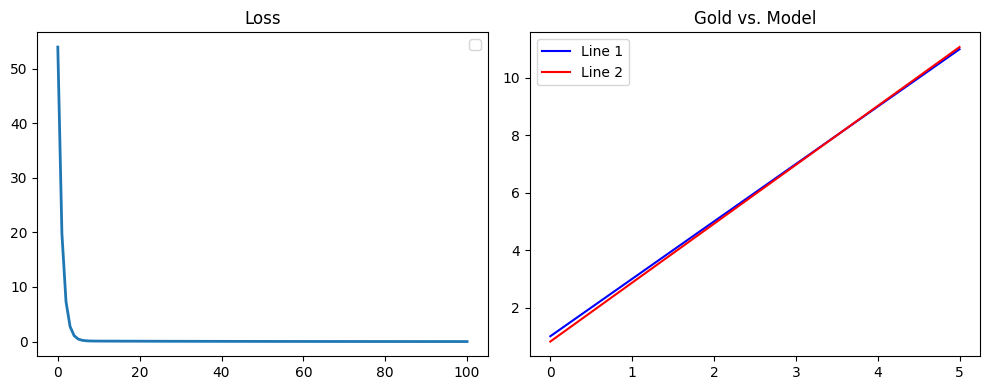

In [100]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs+1), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,6), y, color='blue', label='Line 1')
axes[1].plot(range(0,6), model(x).detach().numpy(), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Using Mean Square Error Loss from torch

In [96]:
import torch
y = torch.tensor([1.0,3,5,7,9,11]).unsqueeze(1)
x = torch.tensor([[0.0],[1],[2],[3],[4],[5]])

epsilon = 0.000001
learning_rate = 0.02
epochs = 100

model = torch.nn.Linear(1,1)

losses = []

for i in range(0,epochs + 1):
  # eli pelkästään 

  pred = model(x)
  loss_i = torch.nn.functional.mse_loss(pred, y)

  model.zero_grad()
  
  loss_i.backward()

  with torch.no_grad():
    for param in model.parameters():
      #print(param)
      #param = param - learning_rate * param.grad
      param -= learning_rate * param.grad

  #if w.grad is not None:
  #  w.grad.zero()
  #w.grad.zero()
  losses.append(loss_i.detach().numpy())
  if i % (epochs/10) == 0:
    print(f"Iter: {i} - deriv_w: {deriv_w} -  loss_i: {loss_i} - w:{model.weight.detach().numpy()} - b:{model.bias.detach().numpy()}")


Iter: 0 - deriv_w: None -  loss_i: 65.5308609008789 - w:[[0.49068767]] - b:[0.60747325]
Iter: 10 - deriv_w: None -  loss_i: 0.0030806853901594877 - w:[[1.9825088]] - b:[1.0242065]
Iter: 20 - deriv_w: None -  loss_i: 0.00018772657494992018 - w:[[1.9931809]] - b:[1.0239481]
Iter: 30 - deriv_w: None -  loss_i: 0.00014790230488870293 - w:[[1.9940027]] - b:[1.0212798]
Iter: 40 - deriv_w: None -  loss_i: 0.00011660405289148912 - w:[[1.9946753]] - b:[1.0188946]
Iter: 50 - deriv_w: None -  loss_i: 9.19278827495873e-05 - w:[[1.9952722]] - b:[1.0167767]
Iter: 60 - deriv_w: None -  loss_i: 7.247178291436285e-05 - w:[[1.995802]] - b:[1.0148962]
Iter: 70 - deriv_w: None -  loss_i: 5.713557402486913e-05 - w:[[1.9962726]] - b:[1.0132264]
Iter: 80 - deriv_w: None -  loss_i: 4.504518801695667e-05 - w:[[1.9966904]] - b:[1.0117439]
Iter: 90 - deriv_w: None -  loss_i: 3.5512919566826895e-05 - w:[[1.9970615]] - b:[1.0104275]
Iter: 100 - deriv_w: None -  loss_i: 2.799629328364972e-05 - w:[[1.9973909]] - b:[

## Using Optimizer from torch

In [102]:
import torch
y = torch.tensor([1.0,3,5,7,9,11]).unsqueeze(1)
x = torch.tensor([[0.0],[1],[2],[3],[4],[5]])

epsilon = 0.000001
learning_rate = 0.02
epochs = 10

model = torch.nn.Linear(1,1)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

losses = []

for i in range(0,epochs + 1):
  # eli pelkästään 

  pred = model(x)
  loss_i = loss(pred, y)

  # hoitaa sen mitä mode.zero_grad() teki
  optimizer.zero_grad() # -> model.zero_grad()
  
  # akkumuloi gradientit, niiltä parametreiltä , joissa oli grad_required = T, eli toisin sanoen linearin parametreiltä
  loss_i.backward()

  # tämä korvaa alemman
  optimizer.step()

  #with torch.no_grad():
  #  for param in model.parameters():
  #    param -= learning_rate * param.grad

  losses.append(loss_i.detach().numpy())
  if i % (epochs/10) == 0:
    print(f"Iter: {i} - deriv_w: {deriv_w} -  loss_i: {loss_i} - w:{model.weight.detach().numpy()} - b:{model.bias.detach().numpy()}")


Iter: 0 - deriv_w: None -  loss_i: 71.58565521240234 - w:[[0.36055318]] - b:[0.81041807]
Iter: 1 - deriv_w: None -  loss_i: 26.22802734375 - w:[[0.9806419]] - b:[0.98194605]
Iter: 2 - deriv_w: None -  loss_i: 9.61734390258789 - w:[[1.3562119]] - b:[1.084604]
Iter: 3 - deriv_w: None -  loss_i: 3.534067392349243 - w:[[1.5838071]] - b:[1.1455986]
Iter: 4 - deriv_w: None -  loss_i: 1.3060311079025269 - w:[[1.7218513]] - b:[1.181394]
Iter: 5 - deriv_w: None -  loss_i: 0.4898260533809662 - w:[[1.8056998]] - b:[1.201953]
Iter: 6 - deriv_w: None -  loss_i: 0.19065254926681519 - w:[[1.8567479]] - b:[1.213305]
Iter: 7 - deriv_w: None -  loss_i: 0.08082783967256546 - w:[[1.8879431]] - b:[1.219098]
Iter: 8 - deriv_w: None -  loss_i: 0.04035026207566261 - w:[[1.9071208]] - b:[1.2215397]
Iter: 9 - deriv_w: None -  loss_i: 0.02527431957423687 - w:[[1.9190226]] - b:[1.221966]
Iter: 10 - deriv_w: None -  loss_i: 0.01950673572719097 - w:[[1.9265177]] - b:[1.2211851]


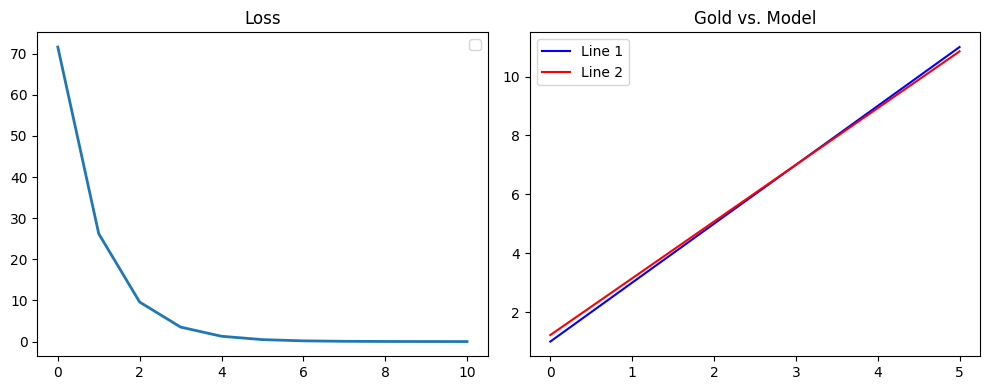

In [103]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the lines on the first subplot (axes[0])
axes[0].plot(range(0,epochs+1), losses, linewidth=2.0)
axes[0].set_title('Loss')
axes[0].legend()

# Plot the lines on the second subplot (axes[1])
axes[1].plot(range(0,6), y, color='blue', label='Line 1')
axes[1].plot(range(0,6), model(x).detach().numpy(), color='red', label='Line 2')

axes[1].set_title('Gold vs. Model')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Using PyTorch to calculate derivates

In [87]:
x = torch.tensor([5.0], requires_grad=True)

def f(x):
  return x ** 2

def df(x):
  return 2 * x

y = f(x)
y.backward()

with torch.no_grad():
  deriv = df(x)

x.grad,deriv

(tensor([10.]), tensor([10.]))

In [88]:
import math

x = torch.tensor([5.0], requires_grad=True)

def f(x):
  return math.e ** x

def df(x):
  return f(x)

y = f(x)
y.backward()

with torch.no_grad():
  deriv = df(x)

x.grad,deriv

(tensor([148.4131]), tensor([148.4131]))